## Used packages

In [ ]:
!pip install keras==2.7.0
!pip install matplotlib==3.2.2
!pip install numpy==1.19.5
!pip install sklearn
!pip install tensorflow==2.7.0

In [2]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from itertools import cycle
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils  import plot_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

## Used functions

In [3]:
def generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size):
  '''
  This function generates data samples according to the given instruction which 
  consisits of two halves of randomly genarated clusters having (mu1,mu2) and (sigma1,sigma2)
  as their mean and variance respectively.
  input_size: The dimension of the generated points.
  NB_POINTS: The total number of generated points.
  '''
  # First Half
  X1 = sigma1 * np.random.randn(NB_POINTS//2,input_size) + mu1
  Y1 = -1*np.ones(NB_POINTS//2, dtype=int)
  # Second Half
  X2 = sigma2 * np.random.randn(NB_POINTS//2,input_size) + mu2
  Y2 = np.ones(NB_POINTS//2, dtype=int)
  # Concatenation
  X =  np.concatenate((X1,X2))
  Y = np.concatenate((Y1,Y2))
  return X,Y

In [4]:
# Shows the clusters
def plot_dataset(input,target,title="Clusters",weights=[0,0,0],show_boundry=False):
  '''
  This function plots data samples with the option to draw the boundary according to
  the given weights vector.
  '''
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1],c=target,cmap="autumn")
  plt.title(title)
  legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Labels")
  ax.add_artist(legend1)
  plt.gca().set_ylim([-5, 5])
  """Plot a line from slope and intercept"""
  if show_boundry:
    axes = plt.gca()
    x_vals = np.array((-2.5,2.5))
    m = -weights[1]/weights[2]
    c = -weights[0]/weights[2]
    y_vals = m*x_vals + c
    plt.plot(x_vals, y_vals, '--')
  plt.show()

In [5]:
# Perceptron implementation
def preceptron(X_train, y_train, NB_INPUT, NB_ITERATIONS):
  w = w_old = np.zeros((NB_INPUT+1,NB_ITERATIONS))
  t=0
  for t in range(1,NB_ITERATIONS):
    w_old =w[:,t-1]
    for xi, yi in zip(X_train, y_train):
      xi = np.insert(xi, 0, 1)
      if np.dot(w[:,t],np.transpose(xi))*yi <=0:
        w[:,t] = w[:,t] + np.dot(yi,xi)
    if np.array_equal(w[:,t], w_old):
      return w[:,t],t
  return w[:,t],t

In [6]:
# Calculate accuracy percentage
def accuracy_metric(X_test, y_test, w):
  s = 0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(w,np.transpose(xi))*yi >0:
      s += 1
  return s / float(len(y_test))

In [7]:
# Shows the clusters for IRIS Dataset
def plot_2D(data, target, target_names,attribut1,attribut2):
  colors = cycle('rgbcmykw') # cycle de couleurs
  target_ids = range(len(target_names))
  plt.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(data[target == i, attribut1], data[target == i,attribut2], c=c, label=label)
  plt.legend()
  plt.show()

In [8]:
# Different evaluation metrics of the model
def evaluation_metrics(y_test,y_predict,classes_names=None):
  print('Recall_score :',recall_score(y_test, y_predict,average='micro'))
  print('Precision_score:',precision_score(y_test, y_predict,average='micro'))
  print('F1_score :',f1_score(y_test, y_predict,average='micro'))
  print('Model acccuracy:',accuracy_score(y_test, y_predict))
  if classes_names:
    print(classification_report(y_test, y_predict,target_names=classes_names))

In [9]:
def plot_training_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

##Part 1 : Implementing fully connected Neural Network using Keras

###1.1 Toy data set

Constant values

In [10]:
NB_POINTS = 250
input_size = 2
mu1 = np.array([-1,0])
mu2 = np.array([1,0])
NB_ITERATIONS = 100

The defined perceptron in action

X  (250, 2)  , Y (250,)
X_train.shape (200, 2) y_train.shape (200,)
nb_iterations_to_converge :  2


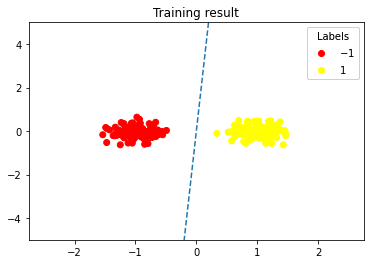

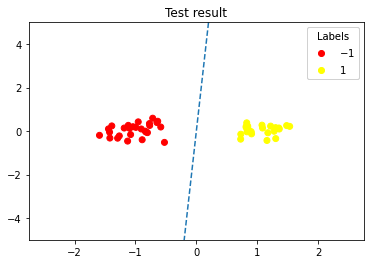


Accuracy :  100.0 %


In [11]:
# Generating data for the first experiment
sigma1 = sigma2 = 0.25
X,Y = generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size)
print("X ",X.shape," , Y",Y.shape)
# SPLIT AND SHUFFLE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)
# Training
nb_iterations_to_converge = 0
weights,nb_iterations_to_converge = preceptron(X_train, y_train, input_size, NB_ITERATIONS)
print("nb_iterations_to_converge : ",nb_iterations_to_converge)
# Result on training set
plot_dataset(X_train,y_train,"Training result",weights=weights,show_boundry=True)
# Result on test set
plot_dataset(X_test,y_test,"Test result",weights=weights,show_boundry=True)
# Accuracy
print("\nAccuracy : ",accuracy_metric(X_test, y_test, weights) * 100.0 , '%')

###1.2 Using keras


In [12]:
# Using the same generated toy dataset
X_train = np.array(X_train)
# Model architecture
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Transforming the labels to categories
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
# Training the model
model.fit(X_train, y_train_cat, epochs=20, batch_size=4)
# Evaluting
print('\nModel acccuracy:',model.evaluate(X_test,y_test_cat,verbose=0)[1])

Epoch 1/20
50/50 [==============================] - 1s 2ms/step - loss: 0.9471 - accuracy: 0.4650
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.8755 - accuracy: 0.4900
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.4900
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.4950
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.5200
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5850
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6850
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.8450
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.9500
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.9950
Epoch 11/20
50/50 [

The Keras model gave the same accuracy as the perceptron.

##Part 2: Lab description


####Importing the IRIS dataset


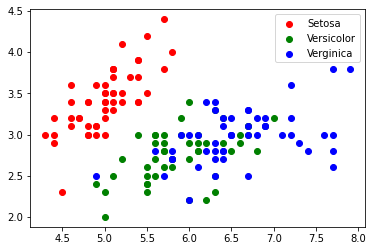

In [14]:
# Fixing the seed to obtain consistent results
tf.random.set_seed(7)
# The IRIS data-set
irisData = datasets.load_iris()
X = list(irisData.data)
y = list(irisData.target)
# Split and Shuffle
X_train, X_test, y_train, y_test = train_test_split(irisData.data, irisData.target, random_state=7,test_size=0.3)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
# Plotting the dataset
classes_names=['Setosa','Versicolor','Verginica']
plot_2D(irisData.data, irisData.target, classes_names,0,1)

###Training different models

####The first model : Initial model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 8ms/step - loss: 2.5594 - accuracy: 0.3238 - val_loss: 1.3312 - val_accuracy: 0.4444
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 1.4084 - accuracy: 0.1429 - val_loss: 1.1655 - val_accuracy: 0.2444
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 1.1427 - accuracy: 0.3048 - val_loss: 1.0579 - val_accuracy: 0.4667
Epoch 4/20
27/27 [===========

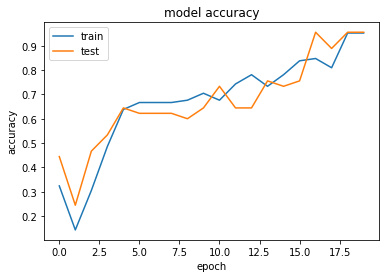

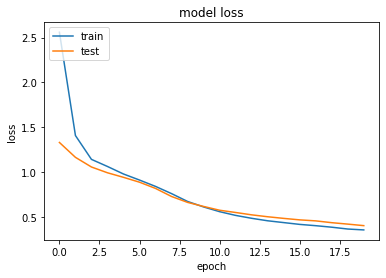

Recall_score : 0.9555555555555556
Precision_score: 0.9555555555555556
F1_score : 0.9555555555555556
Model acccuracy: 0.9555555555555556
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.88      0.93        16
   Verginica       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [15]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
# The model's architecture
model1 = Sequential()
model1.add(Dense(4, input_dim=4 ,activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1.summary())
# Training The model
history = model1.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model1.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

####The second model : Adding a hidden layer

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 7ms/step - loss: 1.2524 - accuracy: 0.3619 - val_loss: 1.1045 - val_accuracy: 0.3111
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 1.0943 - accuracy: 0.3619 - val_loss: 1.0941 - val_accuracy: 0.2667
Epoch 3/20
27/27 [===================

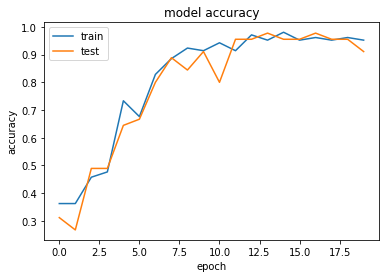

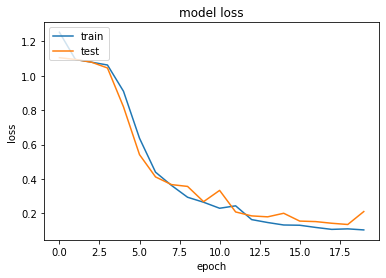

Recall_score : 0.9111111111111111
Precision_score: 0.9111111111111111
F1_score : 0.9111111111111111
Model acccuracy: 0.9111111111111111
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.75      0.86        16
   Verginica       0.81      1.00      0.89        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [16]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
# The model's architecture
model2 = Sequential()
model2.add(Dense(4, input_dim=4 ,activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2.summary())
# Training The model
history = model2.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model2.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

####The third model : Changing the optimizer

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 8ms/step - loss: 2.0926 - accuracy: 0.3143 - val_loss: 1.2416 - val_accuracy: 0.3778
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 1.2378 - accuracy: 0.3429 - val_loss: 1.0823 - val_accuracy: 0.4889
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3619 - val_loss: 1.0279 - val_accuracy: 0.6667
Epoch 4/20
27/27 [===========

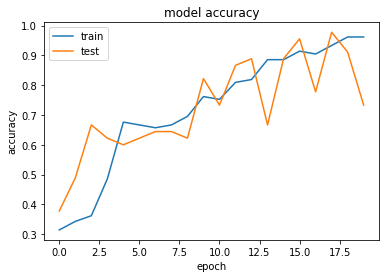

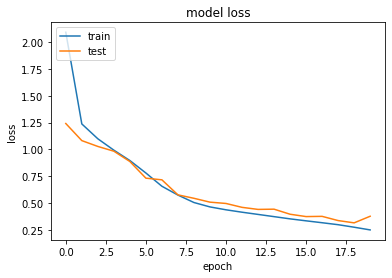

Recall_score : 0.7333333333333333
Precision_score: 0.7333333333333333
F1_score : 0.7333333333333333
Model acccuracy: 0.7333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.25      0.40        16
   Verginica       0.59      1.00      0.74        17

    accuracy                           0.73        45
   macro avg       0.86      0.75      0.71        45
weighted avg       0.84      0.73      0.69        45



In [17]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.01)
# The model's architecture
model3 = Sequential()
model3.add(Dense(4, input_dim=4 ,activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3.summary())
# Training The model
history = model3.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model3.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

####The fourth model : Changing the loss function

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 7ms/step - loss: 2.7663 - accuracy: 0.2571 - val_loss: 1.7201 - val_accuracy: 0.4000
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 1.4760 - accuracy: 0.1429 - val_loss: 1.5860 - val_accuracy: 0.1333
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 1.4069 - accuracy: 0.1714 - val_loss: 1.5673 - val_accuracy: 0.2667
Epoch 4/20
27/27 [===========

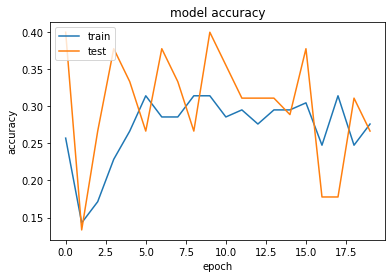

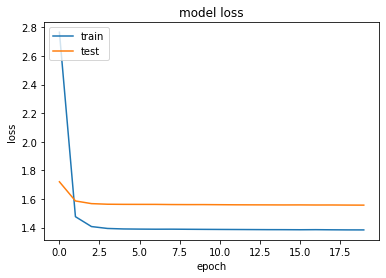

Recall_score : 0.26666666666666666
Precision_score: 0.26666666666666666
F1_score : 0.26666666666666666
Model acccuracy: 0.26666666666666666
              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00        12
  Versicolor       0.41      0.69      0.51        16
   Verginica       0.12      0.06      0.08        17

    accuracy                           0.27        45
   macro avg       0.18      0.25      0.20        45
weighted avg       0.19      0.27      0.21        45



In [18]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
# The model's architecture
model4 = Sequential()
model4.add(Dense(4, input_dim=4 ,activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(loss=tf.keras.losses.Poisson(), optimizer=opt, metrics=['accuracy'])
print(model4.summary())
# Training The model
history = model4.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model4.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

####The fifth model : Adding neurones

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                320       
                                                                 
 dense_12 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 9ms/step - loss: 0.9297 - accuracy: 0.5619 - val_loss: 0.6921 - val_accuracy: 0.6444
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7333 - val_loss: 0.4575 - val_accuracy: 0.6667
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.7810 - val_loss: 0.4650 - val_accuracy: 0.6667
Epoch 4/20
27/27 [=========

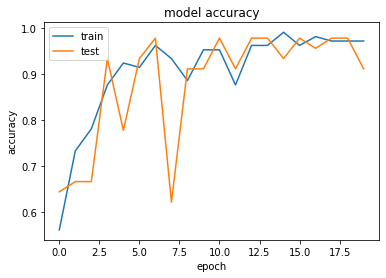

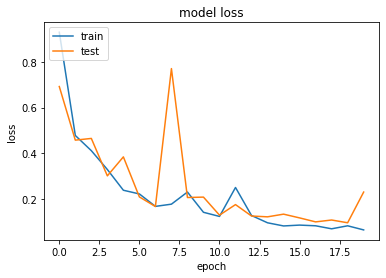

Recall_score : 0.9111111111111111
Precision_score: 0.9111111111111111
F1_score : 0.9111111111111111
Model acccuracy: 0.9111111111111111
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.75      0.86        16
   Verginica       0.81      1.00      0.89        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [19]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
# The model's architecture
model5 = Sequential()
model5.add(Dense(64, input_dim=4 ,activation='relu'))
model5.add(Dense(3, activation='softmax'))
model5.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model5.summary())
# Training The model
history = model5.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model5.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

####The sixth model : Adding nodes and layers


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                320       
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 3)                 51        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
27/27 [==============================] - 1s 8ms/step - loss: 0.8677 - accuracy: 0.5905 - val_loss: 0.6493 - val_accuracy: 0.6444
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7524 - val_loss: 0.4076 - val_accuracy: 0.8000
Epoch 3/20
27/27 [=============

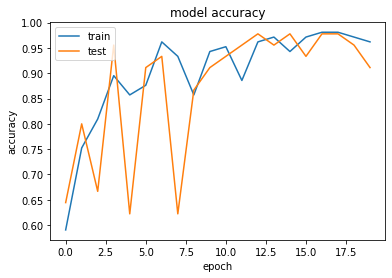

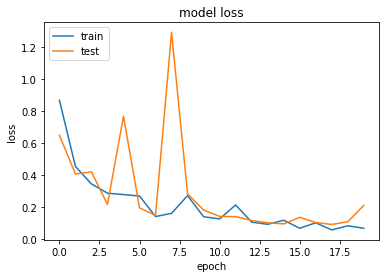

Recall_score : 0.9111111111111111
Precision_score: 0.9111111111111111
F1_score : 0.9111111111111111
Model acccuracy: 0.9111111111111111
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.75      0.86        16
   Verginica       0.81      1.00      0.89        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [20]:
# Fixing the seed to obtain consisting results
tf.random.set_seed(7)
# Declaring the optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
# The model's architecture
model6 = Sequential()
model6.add(Dense(64, input_dim=4 ,activation='relu'))
model6.add(Dense(16, activation='relu'))
model6.add(Dense(3, activation='softmax'))
model6.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model6.summary())
# Training The model
history = model6.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model6.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred,classes_names)

<font color='Cyan'>***Note : </font> We used the testing set for validation because of the low number of data in the dataset.***

###2.1. Selecting best model

####==>The best model architecture created is the first's architecture :
-The effect of the optimizer : Adam is better than RMSprop because Adam or Adaptive Moment Optimization algorithm combines the heuristics of both Momentum and RMSProp.

-The effect of increasing the number of hidden layers : A slightly worst accuracy of the model on the test set because our model have more weights and therefore needs more iterations (epochs) to learn.

-The effect of number of neurones in the hidden layer : A slightly worst accuracy of the model on the test set and the model starts to overfit.

-The effect of changing the loss function : There is no effect on the accuracy because.

-The effect of adding hidden layers and nodes : Worst accuracy, the model is overfitting.


##Part 3: Working towards the CNN

###3.1. Working with the DIGIT dataset


In [21]:
# Importing DIGIT dataset
digitData = datasets.load_digits()
X=list(digitData.data)
y=list(digitData.target)
# Split and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33,test_size=0.2)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
input_shape = X[0].shape
print("Input Shape",input_shape)

Input Shape (64,)


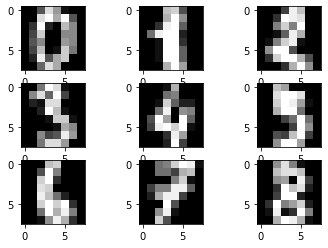

In [22]:
# Plot first few images
for i in range(9):
	# Define subplot
	plt.subplot(330 + 1 + i)
	# Plot raw pixel data
	plt.imshow(digitData.images[i], cmap=plt.get_cmap('gray'))
# Show the figure
plt.show()

Initial Model

Epoch 1/20
360/360 [==============================] - 1s 2ms/step - loss: 2.6338 - accuracy: 0.3305 - val_loss: 1.4816 - val_accuracy: 0.4889
Epoch 2/20
360/360 [==============================] - 1s 2ms/step - loss: 1.1136 - accuracy: 0.6486 - val_loss: 0.8283 - val_accuracy: 0.7306
Epoch 3/20
360/360 [==============================] - 1s 2ms/step - loss: 0.5829 - accuracy: 0.8232 - val_loss: 0.4803 - val_accuracy: 0.8639
Epoch 4/20
360/360 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8907 - val_loss: 0.4215 - val_accuracy: 0.8611
Epoch 5/20
360/360 [==============================] - 1s 2ms/step - loss: 0.2562 - accuracy: 0.9144 - val_loss: 0.3182 - val_accuracy: 0.8972
Epoch 6/20
360/360 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9367 - val_loss: 0.3192 - val_accuracy: 0.9083
Epoch 7/20
360/360 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9485 - val_loss: 0.2712 - val_accuracy: 0.9000
Epoch 

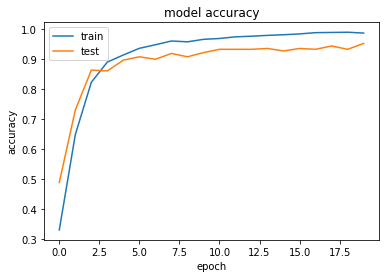

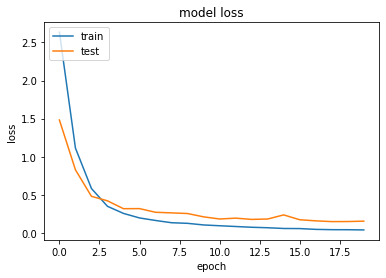

Recall_score : 0.9527777777777777
Precision_score: 0.9527777777777777
F1_score : 0.9527777777777777
Model acccuracy: 0.9527777777777777


In [23]:
# Create the model
model = Sequential()
model.add(Dense(16, input_shape=input_shape, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1, validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred)

Model with more hidden layers and neurones

Epoch 1/20
360/360 [==============================] - 1s 3ms/step - loss: 0.6795 - accuracy: 0.8065 - val_loss: 0.2899 - val_accuracy: 0.9056
Epoch 2/20
360/360 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9596 - val_loss: 0.1443 - val_accuracy: 0.9556
Epoch 3/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9701 - val_loss: 0.1047 - val_accuracy: 0.9750
Epoch 4/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9791 - val_loss: 0.1575 - val_accuracy: 0.9472
Epoch 5/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9694 - val_loss: 0.0890 - val_accuracy: 0.9778
Epoch 6/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.1230 - val_accuracy: 0.9639
Epoch 7/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.2922 - val_accuracy: 0.9389
Epoch 

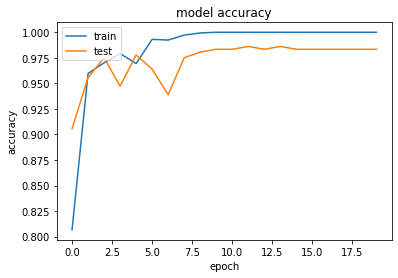

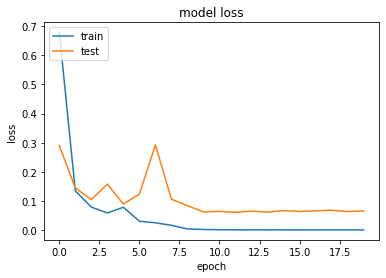

Recall_score : 0.9833333333333333
Precision_score: 0.9833333333333333
F1_score : 0.9833333333333333
Model acccuracy: 0.9833333333333333


In [24]:
# Create the model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1, validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred)

####Interpretation :

-Increasing the number of hidden layers and neurones gave better accuracy

The best model obtained have the following characteristics : 

- The activation function : Relu and Softmax (for the output layer only)

- The error function : sparse_categorical_crossentropy

- Optimzation algorithm : Adam

and the rest of informations are in the following plots.


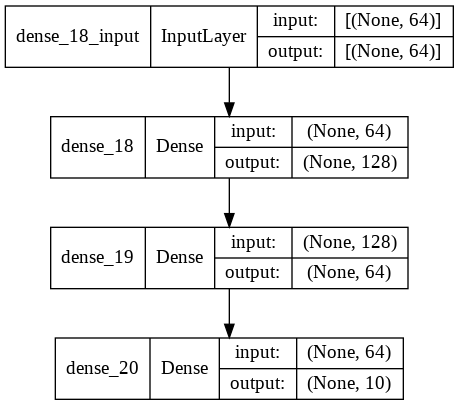

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 17,226
Trainable params: 17,226
Non-trainable params: 0
_________________________________________________________________
None


###3.2. Working with the FACE dataset


In [27]:
# Importing FACE data-set
faceData = datasets.fetch_olivetti_faces()
X=list(faceData.data)
y=list(faceData.target)
# Split and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33,test_size=0.2)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
input_shape = X[0].shape
print("Input Shape",input_shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Input Shape (4096,)


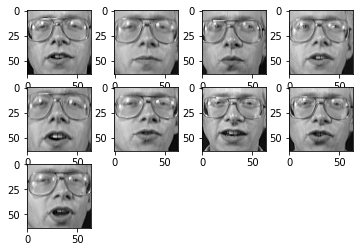

In [28]:
# Plotting the first few images
for i in range(10,19):
	# Define subplot
	plt.subplot(330 + 1 + i)
	# Plot raw pixel data
	plt.imshow(faceData.images[i], cmap=plt.get_cmap('gray'))
# Show the figure
plt.show()

Epoch 1/50
10/10 [==============================] - 1s 61ms/step - loss: 3.7844 - accuracy: 0.0312 - val_loss: 3.8641 - val_accuracy: 0.0125
Epoch 2/50
10/10 [==============================] - 0s 46ms/step - loss: 3.6211 - accuracy: 0.0625 - val_loss: 3.7037 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 45ms/step - loss: 3.5711 - accuracy: 0.0531 - val_loss: 3.4990 - val_accuracy: 0.0500
Epoch 4/50
10/10 [==============================] - 0s 45ms/step - loss: 3.4257 - accuracy: 0.0844 - val_loss: 3.5009 - val_accuracy: 0.0250
Epoch 5/50
10/10 [==============================] - 0s 46ms/step - loss: 3.3166 - accuracy: 0.1187 - val_loss: 3.4642 - val_accuracy: 0.0375
Epoch 6/50
10/10 [==============================] - 0s 47ms/step - loss: 3.2149 - accuracy: 0.1312 - val_loss: 3.3533 - val_accuracy: 0.1250
Epoch 7/50
10/10 [==============================] - 0s 46ms/step - loss: 3.1424 - accuracy: 0.2062 - val_loss: 3.3522 - val_accuracy: 0.1000
Epoch 8/5

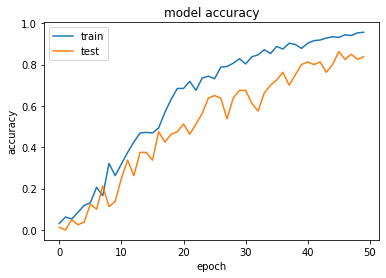

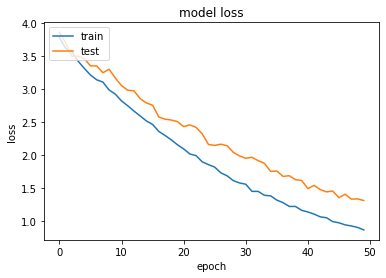

Recall_score : 0.8375
Precision_score: 0.8375
F1_score : 0.8375
Model acccuracy: 0.8375


In [29]:
# The model
model = Sequential()
model.add(Dense(2048, input_shape=input_shape, activation='relu'))
model.add(Dense(40, activation = "softmax" ))
# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test,y_test))
# Predict the data
y_pred = np.argmax(model.predict(X_test),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test,y_pred)

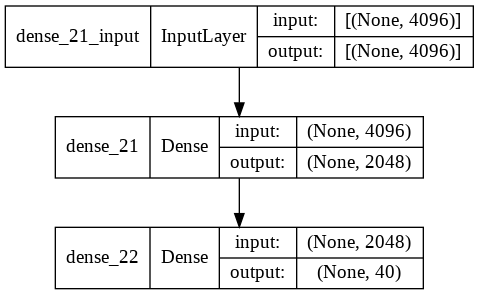

In [30]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)